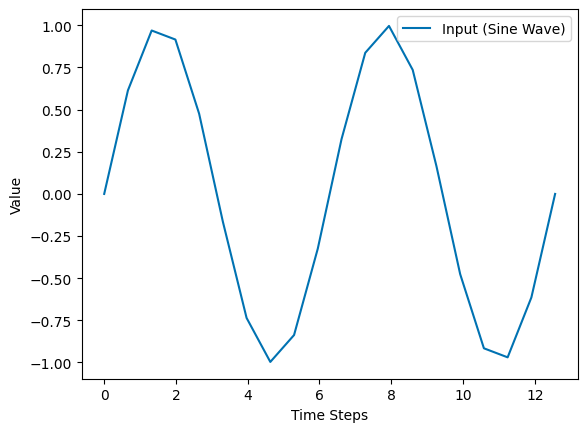

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Using colors that are color blind freindly
selected_colors = ['#E69F00', '#56B4E9', '#009E73']

class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)

    def forward(self, x, hidden):
        out, hidden = self.rnn(x, hidden)
        return out, hidden

sequence_length = 20  # Number of time steps
input_size = 1        # Input dimension (e.g., sensor reading)
hidden_size = 3       # Hidden state dimension

# Lets generate sine wave input
time_steps = np.linspace(0, 4*np.pi, sequence_length)
input_sequence = np.sin(time_steps).reshape(1, sequence_length, input_size)
input_tensor = torch.tensor(input_sequence, dtype=torch.float32)
# Now we can extract the hidden states' information
hidden_state = torch.zeros(1, 1, hidden_size)

model = SimpleRNN(input_size, hidden_size)
outputs, final_hidden = model(input_tensor, hidden_state)

hidden_states = outputs.detach().numpy().squeeze()  # Shape: (20, 3)

# Plotting the inputs and hidden states

plt.plot(time_steps, input_sequence.squeeze(), label='Input (Sine Wave)', color='#0072B2')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()


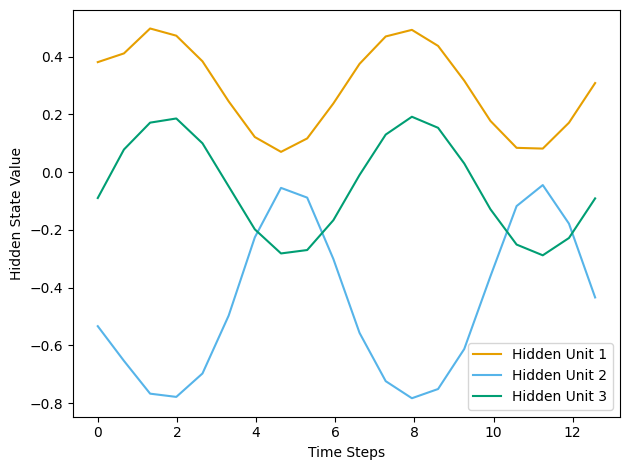

In [ ]:

for i in range(hidden_size):
    plt.plot(time_steps, hidden_states[:, i], label=f'Hidden Unit {i+1}', color=selected_colors[i])
plt.xlabel('Time Steps')
plt.ylabel('Hidden State Value')
plt.legend()

plt.tight_layout()
plt.show()